# 位置データの前処理

- estat / 境界データ / 小地域 / 国勢調査 / 2020年小地域（町丁・字等）(JGD2000) / 世界測地系緯度経度 / 大阪からデータを取得
    - https://www.e-stat.go.jp/gis
- 位置情報と統計情報のファイルが分かれているので、２つの情報をマージする必要がある
- そのためには前処理が必要

In [3]:
!pip install mapclassify

In [33]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import unicodedata

## データの読み込み
- 位置情報の処理にGeoPandasというパッケージを使う
    - https://geopandas.org/en/stable/index.html
- read_fileメソッドを使い読み込み
- plotメソッドを使って可視化

<Axes: >

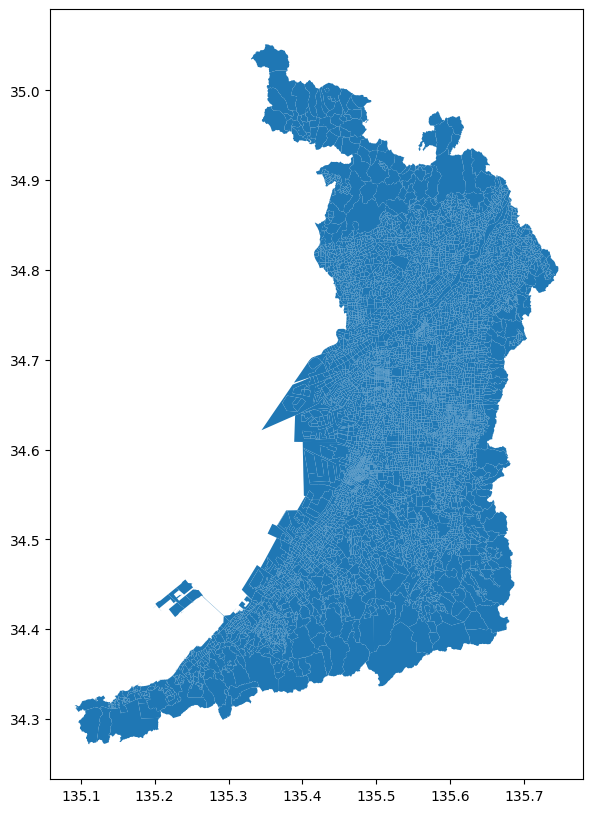

In [5]:
data = gpd.read_file('/content/drive/MyDrive/od-book/国勢調査/A002005212020DDSWC27.zip')
data.plot(figsize=(10,10))

In [6]:
# データを確認
data.head(10)

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,27,27,362,000000,大阪府,田尻町,None,None,8101,75145.022,...,None,None,None,0,0,0,135.286628,34.397788,0000-00,"POLYGON ((135.28779 34.39860, 135.28818 34.398..."
1,27102001001,27,102,001001,大阪府,大阪市都島区,片町一丁目,None,8101,102717.230,...,None,None,None,14,1562,1155,135.524883,34.692489,0010-01,"POLYGON ((135.52721 34.69363, 135.52724 34.693..."
2,27102001002,27,102,001002,大阪府,大阪市都島区,片町二丁目,None,8101,127975.674,...,None,None,None,15,846,680,135.531182,34.695200,0010-02,"POLYGON ((135.53374 34.69707, 135.53385 34.696..."
3,271020020,27,102,002000,大阪府,大阪市都島区,網島町,None,8101,191219.135,...,None,None,None,23,1411,845,135.524147,34.694857,0020-00,"POLYGON ((135.52545 34.69737, 135.52585 34.697..."
4,27102003001,27,102,003001,大阪府,大阪市都島区,東野田町一丁目,None,8101,105965.278,...,None,None,None,29,2046,1541,135.528304,34.696303,0030-01,"POLYGON ((135.52775 34.69448, 135.52707 34.694..."
5,27102003002,27,102,003002,大阪府,大阪市都島区,東野田町二丁目,None,8101,62239.661,...,None,None,None,12,463,306,135.531705,34.697508,0030-02,"POLYGON ((135.53374 34.69707, 135.53307 34.696..."
6,27102003003,27,102,003003,大阪府,大阪市都島区,東野田町三丁目,None,8101,56535.009,...,None,None,None,15,399,259,135.534770,34.698107,0030-03,"POLYGON ((135.53412 34.69690, 135.53385 34.696..."
7,27102003004,27,102,003004,大阪府,大阪市都島区,東野田町四丁目,None,8101,155011.088,...,None,None,None,24,1365,942,135.529458,34.699319,0030-04,"POLYGON ((135.53016 34.70116, 135.53045 34.700..."
8,27102003005,27,102,003005,大阪府,大阪市都島区,東野田町五丁目,None,8101,94619.946,...,None,None,None,24,1580,1109,135.534874,34.700353,0030-05,"POLYGON ((135.53683 34.70154, 135.53678 34.701..."
9,27102004001,27,102,004001,大阪府,大阪市都島区,中野町一丁目,None,8101,139149.925,...,None,None,None,18,1294,1013,135.523642,34.699461,0040-01,"POLYGON ((135.52250 34.70182, 135.52286 34.701..."


## 課題

- KEY_CODEに重複がある

In [7]:
data['KEY_CODE'].value_counts()

273610550      14
272220450       8
272060310       7
271430040       6
272060450       5
               ..
27202041108     1
27202041107     1
27202041106     1
27202041105     1
273830110       1
Name: KEY_CODE, Length: 8730, dtype: int64

In [9]:
count_df = pd.DataFrame(data['KEY_CODE'].value_counts())
count_df

,KEY_CODE
273610550,14
272220450,8
272060310,7
271430040,6
272060450,5
...,...
27202041108,1
27202041107,1
27202041106,1
27202041105,1


In [10]:
# 最も多く含まれるKEY_CODEのデータを観察
data[data['KEY_CODE'] == count_df.index[0]]

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
8778,273610550,27,361,055000,大阪府,熊取町,七山北,E1,8101,280618.042,...,None,None,None,17,93,33,135.363820,34.416231,0550-00,"POLYGON ((135.35631 34.42002, 135.35642 34.419..."
8779,273610550,27,361,055000,大阪府,熊取町,七山北,E5,8101,2546.956,...,27,208,None,0,0,0,135.367546,34.412473,0550-00,"POLYGON ((135.36783 34.41260, 135.36781 34.412..."
8780,273610550,27,361,055000,大阪府,熊取町,七山北,E12,8101,196.966,...,27,208,None,0,0,0,135.367128,34.411789,0550-00,"POLYGON ((135.36727 34.41183, 135.36701 34.411..."
8781,273610550,27,361,055000,大阪府,熊取町,七山北,E9,8101,1105.325,...,27,208,None,0,0,0,135.368511,34.411661,0550-00,"POLYGON ((135.36857 34.41178, 135.36884 34.411..."
8782,273610550,27,361,055000,大阪府,熊取町,七山北,E10,8101,969.804,...,27,208,None,0,0,0,135.367908,34.411414,0550-00,"POLYGON ((135.36810 34.41132, 135.36801 34.411..."
8783,273610550,27,361,055000,大阪府,熊取町,七山北,E13,8101,145.798,...,27,208,None,0,0,0,135.362661,34.417049,0550-00,"POLYGON ((135.36273 34.41700, 135.36259 34.417..."
8784,273610550,27,361,055000,大阪府,熊取町,七山北,E4,8101,4379.859,...,27,208,None,0,0,0,135.366505,34.415852,0550-00,"POLYGON ((135.36674 34.41616, 135.36676 34.416..."
8785,273610550,27,361,055000,大阪府,熊取町,七山北,E2,8101,5930.128,...,27,208,None,0,0,0,135.358576,34.419944,0550-00,"POLYGON ((135.35840 34.41996, 135.35851 34.419..."
8786,273610550,27,361,055000,大阪府,熊取町,七山北,E3,8101,4945.192,...,27,208,None,0,0,0,135.354024,34.419738,0550-00,"POLYGON ((135.35436 34.41951, 135.35405 34.419..."
8787,273610550,27,361,055000,大阪府,熊取町,七山北,E7,8101,1820.612,...,27,208,None,0,0,0,135.354674,34.419740,0550-00,"POLYGON ((135.35487 34.41954, 135.35449 34.419..."


In [12]:
# データを可視化する
most_key = data[data['KEY_CODE'] == count_df.index[0]]
most_key.explore(tooltip='KIGO_E')

## 飛び地の存在

- データに飛び地が存在する
- 統計データと飛び地を考慮しないでマージすると問題が・・・

In [13]:
# 統計データの読み込み
toukei_path = '/content/drive/MyDrive/od-book/国勢調査/preprocessed_data.csv'
toukei_df = pd.read_csv(toukei_path, index_col=0)
data['KEY_CODE'] = pd.to_numeric(data['KEY_CODE'])
m = pd.merge(data, toukei_df, on='KEY_CODE')
m

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,女４５～４９歳,女５０～５４歳,女５５～５９歳,女６０～６４歳,女６５～６９歳,女７０～７４歳,女１５歳未満,女１５～６４歳,女６５歳以上,女７５歳以上
0,27102001001,27,102,001001,大阪府,大阪市都島区,片町一丁目,None,8101,102717.230,...,59,49,34,27,22,24,38,554,74,28
1,27102001002,27,102,001002,大阪府,大阪市都島区,片町二丁目,None,8101,127975.674,...,25,17,15,11,11,17,11,279,51,23
2,271020020,27,102,002000,大阪府,大阪市都島区,網島町,None,8101,191219.135,...,65,42,40,35,42,58,60,448,240,140
3,27102003001,27,102,003001,大阪府,大阪市都島区,東野田町一丁目,None,8101,105965.278,...,81,74,48,31,18,14,57,717,72,40
4,27102003002,27,102,003002,大阪府,大阪市都島区,東野田町二丁目,None,8101,62239.661,...,14,10,6,5,6,3,7,99,53,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,27383007001,27,383,007001,大阪府,千早赤阪村,大字小吹,None,8101,1941656.767,...,6,6,8,11,9,8,21,66,43,26
8938,27383007002,27,383,007002,大阪府,千早赤阪村,大字小吹,None,8101,362713.021,...,73,45,34,49,108,197,70,359,517,212
8939,273830090,27,383,009000,大阪府,千早赤阪村,大字中津原,None,8101,2504824.340,...,8,6,11,11,20,11,2,50,64,33
8940,273830100,27,383,010000,大阪府,千早赤阪村,大字東阪,None,8101,4121410.761,...,11,20,9,13,17,17,13,93,135,101


In [ ]:
count_df.index = pd.to_numeric(count_df.index)
m1 = m[m['KEY_CODE'] == count_df.index[0]].copy()
m1.loc[:, '総数、年齢「不詳」含む':]

,総数、年齢「不詳」含む,総数０～４歳,総数５～９歳,総数１０～１４歳,総数１５～１９歳,総数２０～２４歳,総数２５～２９歳,総数３０～３４歳,総数３５～３９歳,総数４０～４４歳,...,女４５～４９歳,女５０～５４歳,女５５～５９歳,女６０～６４歳,女６５～６９歳,女７０～７４歳,女１５歳未満,女１５～６４歳,女６５歳以上,女７５歳以上
8777,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8778,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8779,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8780,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8781,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8782,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8783,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8784,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8785,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11
8786,93,0,1,3,6,7,1,2,0,7,...,4,6,4,0,2,4,3,23,17,11


- 統計データはKEY_CODEに対して１つ渡されているので、飛び地のある分がデータに追加されてしまう
- 実際の人口×飛び地分のそのままマージしてしまうと、KEY_CODEに対するデータとなる
- 位置データに関して、KEY_CODEに対して１つのデータにまとめたい
    - dissolve メソッドを使う

In [16]:
data_dissolved = data.dissolve('KEY_CODE', as_index=False)
data_dissolved

,KEY_CODE,geometry,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KIGO_D,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1
0,27,"POLYGON ((135.28779 34.39860, 135.28818 34.398...",27,362,000000,大阪府,田尻町,None,None,8101,...,None,None,None,None,0,0,0,135.286628,34.397788,0000-00
1,271020020,"POLYGON ((135.52545 34.69737, 135.52585 34.697...",27,102,002000,大阪府,大阪市都島区,網島町,None,8101,...,None,None,None,None,23,1411,845,135.524147,34.694857,0020-00
2,271040180,"POLYGON ((135.40455 34.65372, 135.40117 34.650...",27,104,018001,大阪府,大阪市此花区,夢洲東,None,8101,...,None,None,None,None,1,0,0,135.395963,34.649989,0180-01
3,271040190,"POLYGON ((135.39235 34.65810, 135.38565 34.650...",27,104,019001,大阪府,大阪市此花区,夢洲,None,8101,...,None,None,None,None,1,0,0,135.382652,34.651128,0190-01
4,271040200,"POLYGON ((135.39838 34.65716, 135.39566 34.653...",27,104,020001,大阪府,大阪市此花区,夢洲中,None,8101,...,None,None,None,None,1,0,0,135.392161,34.654059,0200-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8725,27382601003,"POLYGON ((135.64640 34.47967, 135.64647 34.479...",27,382,601003,大阪府,河南町,さくら坂三丁目,None,8101,...,None,None,None,None,19,557,201,135.644961,34.478905,6010-03
8726,27382601004,"POLYGON ((135.64794 34.48094, 135.64802 34.480...",27,382,601004,大阪府,河南町,さくら坂四丁目,None,8101,...,None,None,None,None,21,614,227,135.647571,34.478971,6010-04
8727,27382601005,"POLYGON ((135.64778 34.48416, 135.64778 34.484...",27,382,601005,大阪府,河南町,さくら坂五丁目,None,8101,...,None,None,None,None,6,0,0,135.644960,34.482028,6010-05
8728,27383007001,"POLYGON ((135.61272 34.44640, 135.61281 34.446...",27,383,007001,大阪府,千早赤阪村,大字小吹,None,8101,...,None,None,None,None,3,244,83,135.613510,34.437877,0070-01


In [19]:
tobichi = data_dissolved[data_dissolved['KEY_CODE'] == int(count_df.index[0])]
tobichi

,KEY_CODE,geometry,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KIGO_D,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1
1656,273610550,"MULTIPOLYGON (((135.35673 34.41990, 135.35683 ...",27,361,055000,大阪府,熊取町,七山北,E1,8101,...,D,27,208,None,17,93,33,135.36382,34.416231,0550-00


In [20]:
tobichi.explore()

In [22]:
data_dissolved.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8730 entries, 0 to 8729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    8730 non-null   int64   
 1   geometry    8730 non-null   geometry
 2   PREF        8730 non-null   object  
 3   CITY        8730 non-null   object  
 4   S_AREA      8730 non-null   object  
 5   PREF_NAME   8730 non-null   object  
 6   CITY_NAME   8730 non-null   object  
 7   S_NAME      8725 non-null   object  
 8   KIGO_E      131 non-null    object  
 9   HCODE       8730 non-null   int64   
 10  AREA        8730 non-null   float64 
 11  PERIMETER   8730 non-null   float64 
 12  R2KAxx      8730 non-null   int64   
 13  R2KAxx_ID   8730 non-null   int64   
 14  KIHON1      8730 non-null   object  
 15  DUMMY1      8730 non-null   object  
 16  KIHON2      8730 non-null   object  
 17  KEYCODE1    8730 non-null   object  
 18  KEYCODE2    8729 non-null   object  
 19

<Axes: >

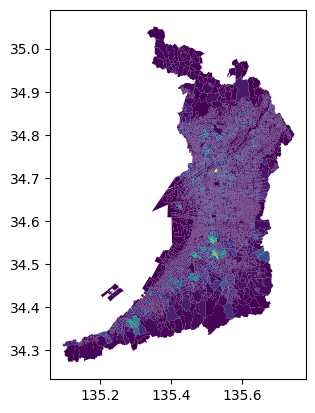

In [24]:
# 前処理済みの統計データと位置情報のマージ（KEY_CODEを使って）

gis_data = data_dissolved[['KEY_CODE', 'geometry']].copy()
toukei_path = '/content/drive/MyDrive/od-book/国勢調査/preprocessed_data.csv'
toukei_data = pd.read_csv(toukei_path, index_col=0)
merged_df = pd.merge(gis_data, toukei_data, on='KEY_CODE')
merged_df.plot('総数、年齢「不詳」含む')

In [ ]:
# 注意 mergeでDataFrameを前にすると位置情報が使えない

m = pd.merge(toukei_data, gis_data, on='KEY_CODE')
m.plot('総数、年齢「不詳」含む')

In [27]:
# データ観察の際に日本語の長い文字列を打つのは手間

merged_df.columns

Index(['KEY_CODE', 'geometry', 'HYOSYO', 'CITYNAME', 'NAME', 'HTKSYORI',
       'HTKSAKI', 'GASSAN', '総数、年齢「不詳」含む', '総数０～４歳', '総数５～９歳', '総数１０～１４歳',
       '総数１５～１９歳', '総数２０～２４歳', '総数２５～２９歳', '総数３０～３４歳', '総数３５～３９歳', '総数４０～４４歳',
       '総数４５～４９歳', '総数５０～５４歳', '総数５５～５９歳', '総数６０～６４歳', '総数６５～６９歳', '総数７０～７４歳',
       '総数１５歳未満', '総数１５～６４歳', '総数６５歳以上', '総数７５歳以上', '男の総数、年齢「不詳」含む', '男０～４歳',
       '男５～９歳', '男１０～１４歳', '男１５～１９歳', '男２０～２４歳', '男２５～２９歳', '男３０～３４歳',
       '男３５～３９歳', '男４０～４４歳', '男４５～４９歳', '男５０～５４歳', '男５５～５９歳', '男６０～６４歳',
       '男６５～６９歳', '男７０～７４歳', '男１５歳未満', '男１５～６４歳', '男６５歳以上', '男７５歳以上',
       '女の総数、年齢「不詳」含む', '女０～４歳', '女５～９歳', '女１０～１４歳', '女１５～１９歳', '女２０～２４歳',
       '女２５～２９歳', '女３０～３４歳', '女３５～３９歳', '女４０～４４歳', '女４５～４９歳', '女５０～５４歳',
       '女５５～５９歳', '女６０～６４歳', '女６５～６９歳', '女７０～７４歳', '女１５歳未満', '女１５～６４歳',
       '女６５歳以上', '女７５歳以上'],
      dtype='object')

In [29]:
# 変更用の辞書を作成
henko_dict = {
    '年齢「不詳」含む': 'all',
    '総数': 'total_',
    '男': 'men_',
    '女': 'women_',
    'の': '',
    '、': '',
    '歳': '_age',
    '未満': '_less',
    '以上': '_over',
    '～': '_'
}
# 変更したいカラム名のリストを変数に格納
cols = list(merged_df.columns)

# 変更用の辞書を反映する
for k, v in henko_dict.items():
    cols = [col.replace(k, v) for col in cols]
# 全角の数値を半角に変換
cols = [unicodedata.normalize('NFKC', col) for col in cols]
# カラム名を作成したものに置き換え
merged_df.columns = cols

In [30]:
cols

['KEY_CODE',
 'geometry',
 'HYOSYO',
 'CITYNAME',
 'NAME',
 'HTKSYORI',
 'HTKSAKI',
 'GASSAN',
 'total_all',
 'total_0_4_age',
 'total_5_9_age',
 'total_10_14_age',
 'total_15_19_age',
 'total_20_24_age',
 'total_25_29_age',
 'total_30_34_age',
 'total_35_39_age',
 'total_40_44_age',
 'total_45_49_age',
 'total_50_54_age',
 'total_55_59_age',
 'total_60_64_age',
 'total_65_69_age',
 'total_70_74_age',
 'total_15_age_less',
 'total_15_64_age',
 'total_65_age_over',
 'total_75_age_over',
 'men_total_all',
 'men_0_4_age',
 'men_5_9_age',
 'men_10_14_age',
 'men_15_19_age',
 'men_20_24_age',
 'men_25_29_age',
 'men_30_34_age',
 'men_35_39_age',
 'men_40_44_age',
 'men_45_49_age',
 'men_50_54_age',
 'men_55_59_age',
 'men_60_64_age',
 'men_65_69_age',
 'men_70_74_age',
 'men_15_age_less',
 'men_15_64_age',
 'men_65_age_over',
 'men_75_age_over',
 'women_total_all',
 'women_0_4_age',
 'women_5_9_age',
 'women_10_14_age',
 'women_15_19_age',
 'women_20_24_age',
 'women_25_29_age',
 'women_30_

In [31]:
merged_df

,KEY_CODE,geometry,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,total_all,total_0_4_age,...,women_45_49_age,women_50_54_age,women_55_59_age,women_60_64_age,women_65_69_age,women_70_74_age,women_15_age_less,women_15_64_age,women_65_age_over,women_75_age_over
0,271020020,"POLYGON ((135.52545 34.69737, 135.52585 34.697...",2,大阪市都島区,網島町,0,NaN,NaN,1411,39,...,65,42,40,35,42,58,60,448,240,140
1,271040180,"POLYGON ((135.40455 34.65372, 135.40117 34.650...",2,大阪市此花区,夢洲東,0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,271040190,"POLYGON ((135.39235 34.65810, 135.38565 34.650...",2,大阪市此花区,夢洲,0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,271040200,"POLYGON ((135.39838 34.65716, 135.39566 34.653...",2,大阪市此花区,夢洲中,0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,271041000,"POLYGON ((135.40676 34.67383, 135.40681 34.673...",2,大阪市此花区,NaN,0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8724,27382601003,"POLYGON ((135.64640 34.47967, 135.64647 34.479...",4,河南町,さくら坂三丁目,0,NaN,NaN,557,12,...,21,30,44,20,18,12,19,196,61,31
8725,27382601004,"POLYGON ((135.64794 34.48094, 135.64802 34.480...",4,河南町,さくら坂四丁目,0,NaN,NaN,614,15,...,19,20,48,43,24,31,22,202,99,44
8726,27382601005,"POLYGON ((135.64778 34.48416, 135.64778 34.484...",4,河南町,さくら坂五丁目,0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
8727,27383007001,"POLYGON ((135.61272 34.44640, 135.61281 34.446...",4,千早赤阪村,大字小吹,0,NaN,NaN,244,8,...,6,6,8,11,9,8,21,66,43,26


In [35]:
px.histogram(merged_df['total_all'])